In [80]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from dython import nominal

In [78]:
clean_dat = pd.read_csv("cleaned_data.csv")
clean_dat = clean_dat.iloc[:, 1:]
clean_dat.head()
#Using Numerical Data first
HorseP = pd.DataFrame(clean_dat["HorsePower"])
Cylinder = pd.DataFrame(clean_dat["Cylinders"])
Price = pd.DataFrame(clean_dat["Price"])
NumAll = pd.DataFrame(clean_dat[["HorsePower", "Cylinders", "Price"]])
clean_dat.head()

,Manufacturer,Model,HorsePower,Cylinders,Category,Price
0,BMW,1 Series M,335.0,6.0,"Factory Tuner,Luxury,High-Performance",46135
1,BMW,1 Series,300.0,6.0,"Luxury,Performance",40650
2,BMW,1 Series,300.0,6.0,"Luxury,High-Performance",36350
3,BMW,1 Series,230.0,6.0,"Luxury,Performance",29450
4,BMW,1 Series,230.0,6.0,Luxury,34500


<AxesSubplot:>

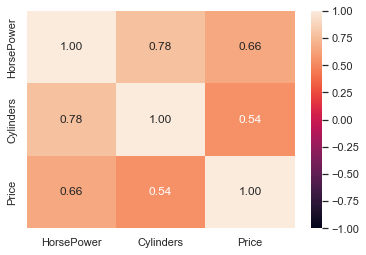

In [76]:
#Initial Correlation
sb.heatmap(NumAll.corr(),vmin = -1, vmax = 1, annot = True, fmt=".2f")

<AxesSubplot:>

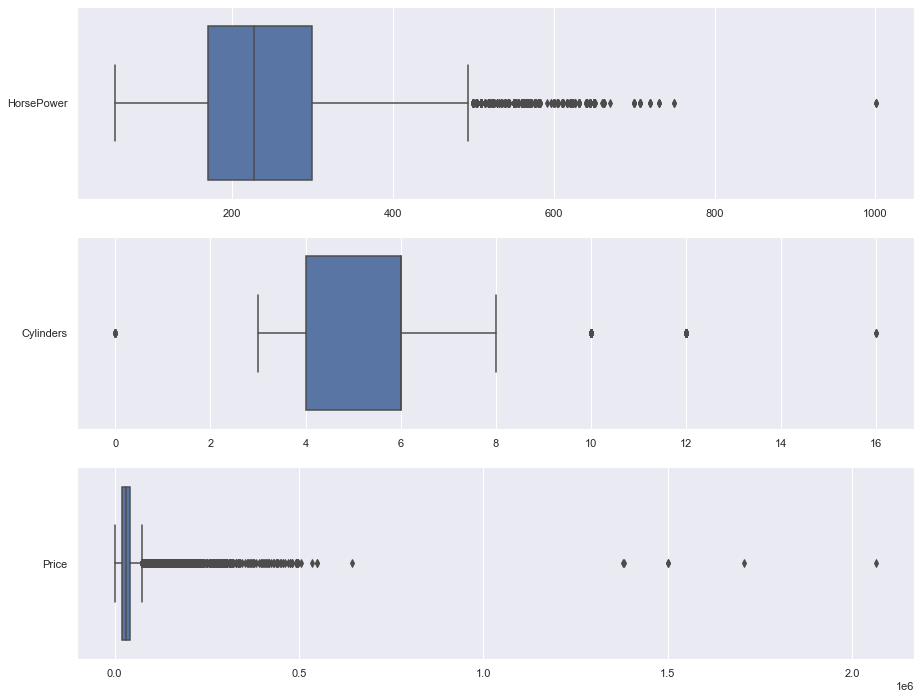

In [77]:
fig, axes = plt.subplots(3, 1, figsize = (15,12))
sb.boxplot(ax = axes[0], data = HorseP, orient = 'h')
sb.boxplot(ax = axes[1], data = Cylinder, orient = 'h')
sb.boxplot(ax = axes[2], data = Price, orient = 'h')

Removing any or all outliers improved correlation between horsepower and price, but severely decreased the correlation between number of cylinders and price, so Im opting to keep outliers inside the dataset.

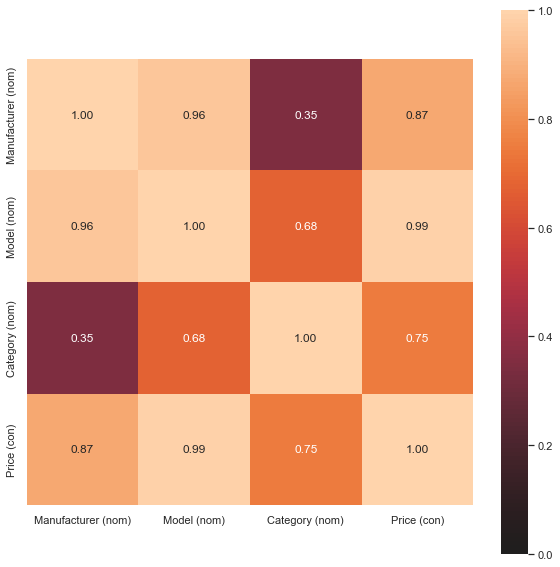

{'corr':                     Manufacturer (nom)  Model (nom)  Category (nom)  \
 Manufacturer (nom)            1.000000     0.957059        0.345618   
 Model (nom)                   0.957059     1.000000        0.678432   
 Category (nom)                0.345618     0.678432        1.000000   
 Price (con)                   0.868984     0.986743        0.745065   
 
                     Price (con)  
 Manufacturer (nom)     0.868984  
 Model (nom)            0.986743  
 Category (nom)         0.745065  
 Price (con)            1.000000  ,
 'ax': <AxesSubplot:>}

In [81]:
CatAll = pd.DataFrame(clean_dat[['Manufacturer', 'Model', 'Category', 'Price']])
nominal.associations(CatAll, mark_columns = True, figsize = (10,10))

Could choose Horsepower + Manufacturer and Model as predictors. Category section not sure how to deal with, cause cars fit into multiple categories at once.